<a href="https://colab.research.google.com/github/isa77150/isa77150/blob/main/reseau_de_neurones1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [2]:
# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


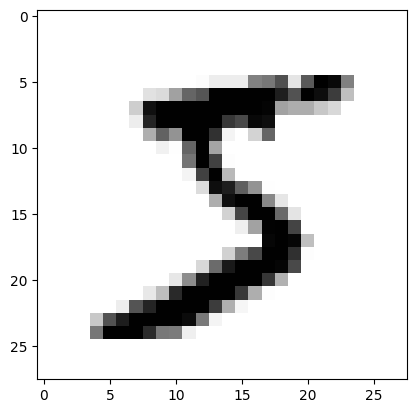

In [6]:
#plot first image
image = x_train[0].reshape([28, 28]) #28x28 =784
plt.imshow(image, cmap=plt.get_cmap('gray_r'))


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [5]:
y_train[0]

5

label de l image 0

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_train.shape

(60000,)

In [21]:
x_train [2:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [9]:
# Normalisation des données
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [12]:
# Construction du modèle de réseau de neurones
model1 = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

28*28=784 pixels

In [ ]:
# model 2
model2 = Sequential()
model2.add(Dense(512, activation = 'relu', input_shape=(784,)))
model2.add(Dense(10, activation = 'softmax'))
model2.summary()

In [22]:
# Construction du modèle de réseau de neurones
model3 = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
# Compilation du modèle
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Entraînement du modèle
model1.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1891 - accuracy: 0.7139
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4965 - accuracy: 0.8709
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3886 - accuracy: 0.8928
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3460 - accuracy: 0.9025
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3216 - accuracy: 0.9078


In [17]:
# Évaluation du modèle sur les données de test
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Accuracy sur les données de test :', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.9144
Accuracy sur les données de test : 0.9143999814987183


In [23]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model3.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.8377 - accuracy: 0.7895
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3620 - accuracy: 0.8984
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3105 - accuracy: 0.9108
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2832 - accuracy: 0.9180
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2626 - accuracy: 0.9233
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2438 - accuracy: 0.9292
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2254 - accuracy: 0.9346
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2079 - accuracy: 0.9403
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1929 - accuracy: 0.9443
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [26]:
test_loss, test_acc = model3.evaluate(x_test, y_test)
print('Accuracy sur les données de test :', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.1764 - accuracy: 0.9474
Accuracy sur les données de test : 0.9473999738693237


313/313 [==============================] - 1s 3ms/step


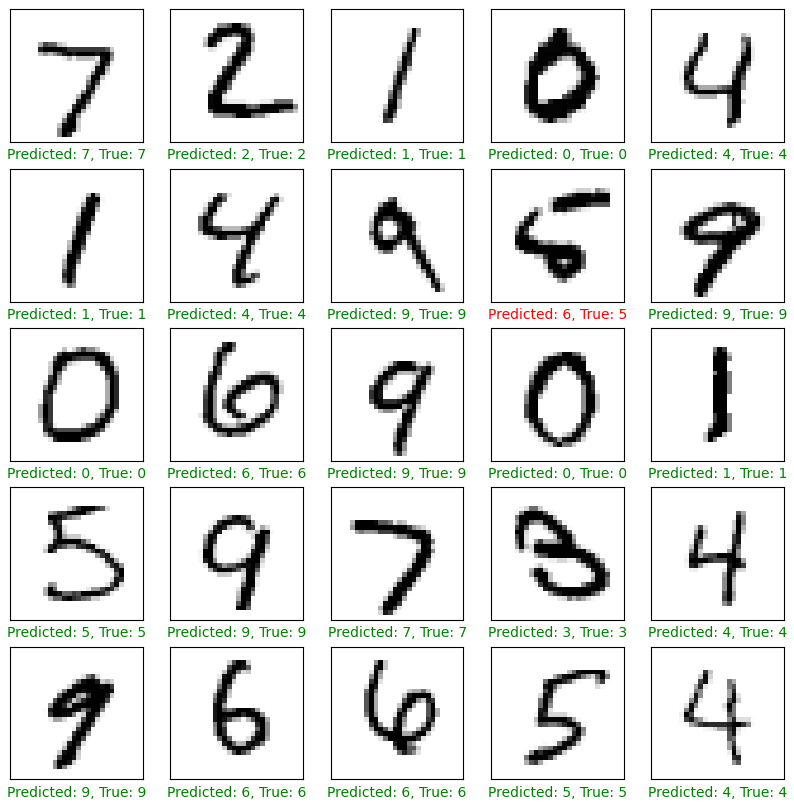

In [27]:
# Prédiction sur quelques images de test
predictions = model3.predict(x_test)

# Affichage des résultats pour quelques images de test
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}, True: {true_label}', color=color)
plt.show()

In [28]:
model4 = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model4.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7616 - accuracy: 0.8033
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3428 - accuracy: 0.9031
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2972 - accuracy: 0.9147
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2693 - accuracy: 0.9218
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2451 - accuracy: 0.9281
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2220 - accuracy: 0.9350
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2012 - accuracy: 0.9421
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1822 - accuracy: 0.9474
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1656 - accuracy: 0.9529
Epoch 10/10
1875/1875 [==============================] - 18s 9ms/st

In [31]:
test_loss, test_acc = model4.evaluate(x_test, y_test)
print('Accuracy sur les données de test :', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1462 - accuracy: 0.9575
Accuracy sur les données de test : 0.9574999809265137


313/313 [==============================] - 1s 3ms/step


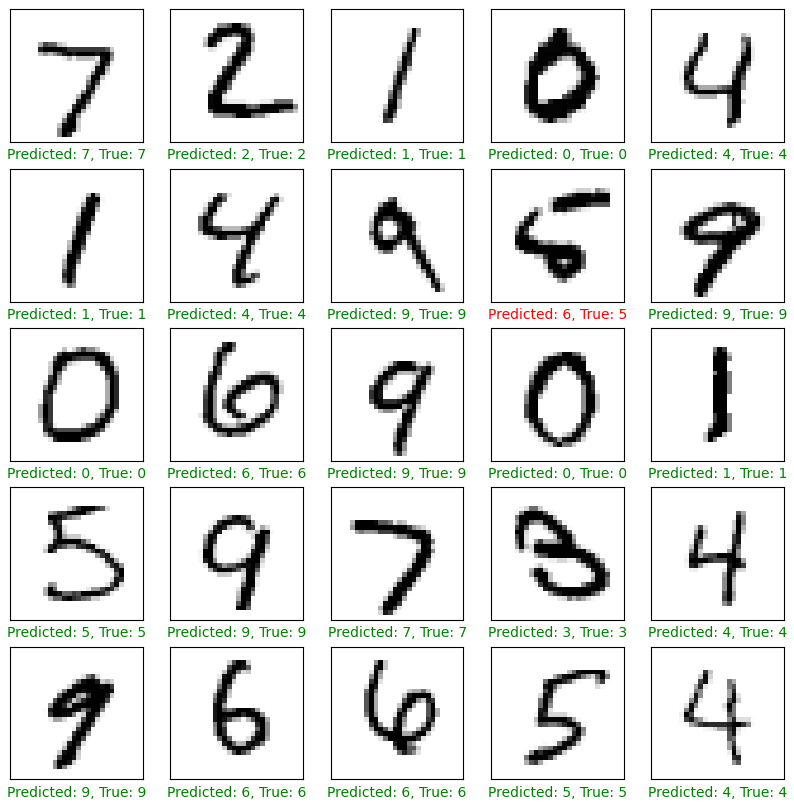

In [32]:
# Prédiction sur quelques images de test
predictions = model4.predict(x_test)

# Affichage des résultats pour quelques images de test
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}, True: {true_label}', color=color)
plt.show()